In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
print("Shape of the DataFrame:", df.shape)

print("\nBasic statistical summary:")
print(df.describe())

print("\nDataFrame info (data types and non-null values):")
df.info()

print("\nDistribution of the target variable ('Class'):")
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True) * 100)

Shape of the DataFrame: (15936, 31)

Basic statistical summary:
               Time            V1            V2            V3            V4  \
count  15936.000000  15936.000000  15936.000000  15936.000000  15936.000000   
mean   12121.217871     -0.254293      0.277171      0.803852      0.301343   
std     8982.283843      1.843083      1.491497      1.704252      1.491713   
min        0.000000    -28.344757    -40.978852    -27.368650     -5.172595   
25%     3633.500000     -0.970824     -0.286548      0.371671     -0.621215   
50%    10980.000000     -0.318478      0.247437      0.941822      0.231366   
75%    20621.500000      1.161949      0.884689      1.575960      1.180124   
max    27371.000000      1.960497     14.601998      4.101716     11.927512   

                 V5            V6            V7            V8            V9  \
count  15936.000000  15936.000000  15936.000000  15936.000000  15936.000000   
mean      -0.130469      0.112551     -0.150434      0.000687     

In [6]:
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [7]:
df.dropna(inplace=True)
print("Shape of the DataFrame after dropping rows with missing values:", df.shape)
print("Missing values per column after dropping:")
print(df.isnull().sum())

Shape of the DataFrame after dropping rows with missing values: (15935, 31)
Missing values per column after dropping:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


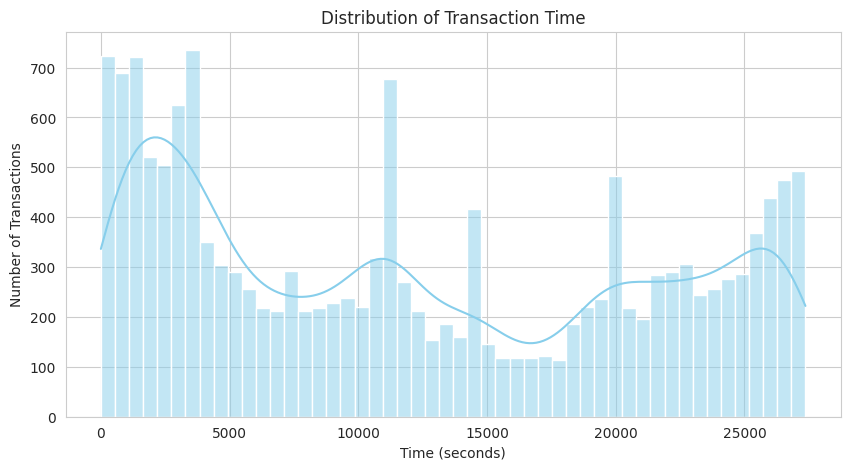

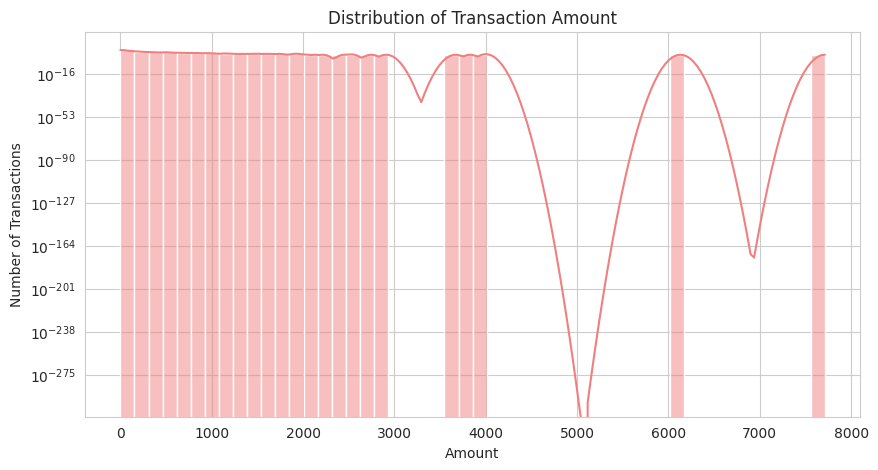

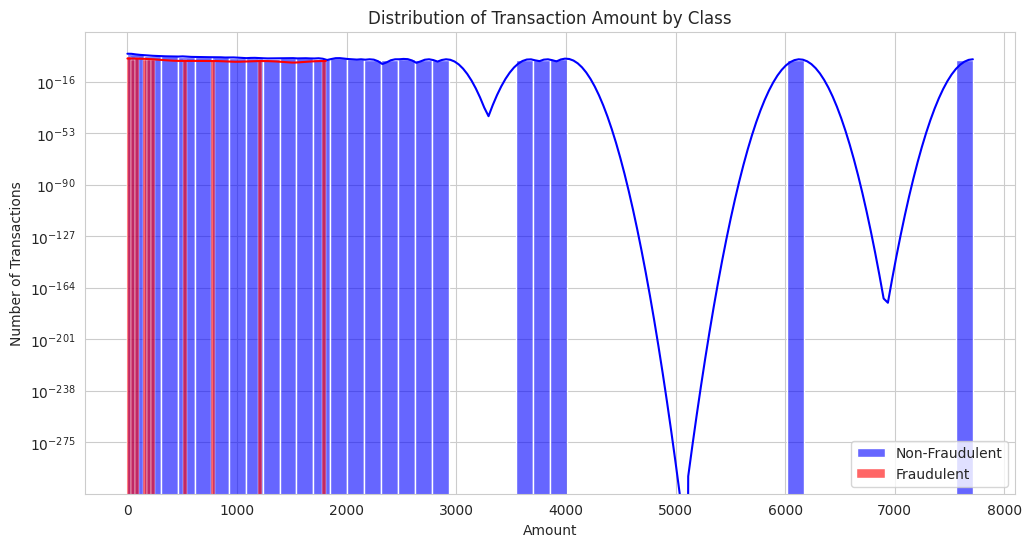

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set_style("whitegrid")

# Plotting distribution of 'Time'
plt.figure(figsize=(10, 5))
sns.histplot(df['Time'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Transaction Time')
plt.xlabel('Time (seconds)')
plt.ylabel('Number of Transactions')
plt.show()

# Plotting distribution of 'Amount'
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=50, kde=True, color='lightcoral')
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

# Comparing 'Amount' distribution for fraudulent vs. non-fraudulent transactions
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Class'] == 0]['Amount'], bins=50, kde=True, color='blue', label='Non-Fraudulent', alpha=0.6)
sns.histplot(df[df['Class'] == 1]['Amount'], bins=50, kde=True, color='red', label='Fraudulent', alpha=0.6)
plt.title('Distribution of Transaction Amount by Class')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.legend()
plt.show()

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Apply StandardScaler to 'Time' and 'Amount' columns
scaler = StandardScaler()
df['Scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))

# Drop original 'Time' and 'Amount' columns
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Data preprocessing complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

print("\nFirst 5 rows of X_train (with scaled features):\n", X_train.head())

Data preprocessing complete.
Shape of X_train: (11154, 30)
Shape of X_test: (4781, 30)
Shape of y_train: (11154,)
Shape of y_test: (4781,)

First 5 rows of X_train (with scaled features):
              V1        V2        V3        V4        V5        V6        V7  \
972    1.444837 -1.245312  0.776082 -1.491727 -1.765425 -0.270934 -1.443537   
10226  0.664647 -0.713212  1.115532  1.555137 -0.743430  1.086679 -0.735527   
13258 -1.190909  1.533575  2.714787  3.418949  0.551822  1.235712  0.601324   
11777 -2.278075 -2.241390  2.144276  2.577710 -0.788018  0.980015  1.410935   
6619   1.237176  0.317586  0.634806  1.402061 -0.170103 -0.225668 -0.110780   

             V8        V9       V10  ...       V21       V22       V23  \
972    0.108861 -1.657989  1.593055  ... -0.211910 -0.336079  0.071196   
10226  0.429763  1.894635 -0.424598  ...  0.184307  0.489629 -0.184831   
13258  0.181869 -0.269797  0.185303  ... -0.097324  0.121740 -0.162523   
11777 -0.061736  1.675586 -1.246743  ...

In [10]:
from sklearn.linear_model import LogisticRegression

# Instantiate Logistic Regression model with class_weight='balanced' for imbalanced datasets
# Using 'liblinear' solver for good performance on smaller datasets and 'random_state' for reproducibility
model = LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42)

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Logistic Regression model trained and predictions made.")

Logistic Regression model trained and predictions made.


In [11]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print the accuracy score
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

# Calculate probability predictions for the positive class
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate and print the ROC AUC score
print("\nROC AUC Score:", roc_auc_score(y_test, y_pred_proba))


Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      4759
         1.0       0.35      0.86      0.49        22

    accuracy                           0.99      4781
   macro avg       0.67      0.93      0.74      4781
weighted avg       1.00      0.99      0.99      4781


Accuracy Score: 0.9918427107299728

ROC AUC Score: 0.9928556419415844


<Figure size 800x600 with 0 Axes>

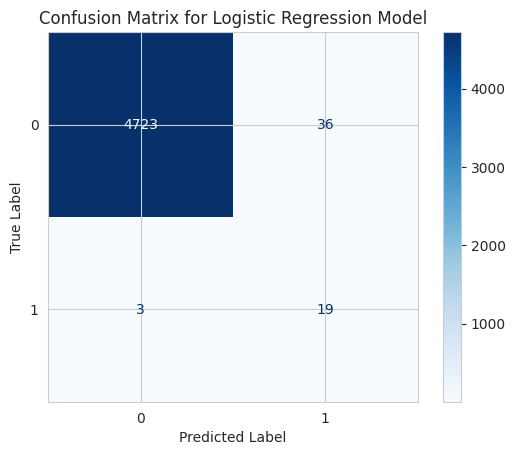

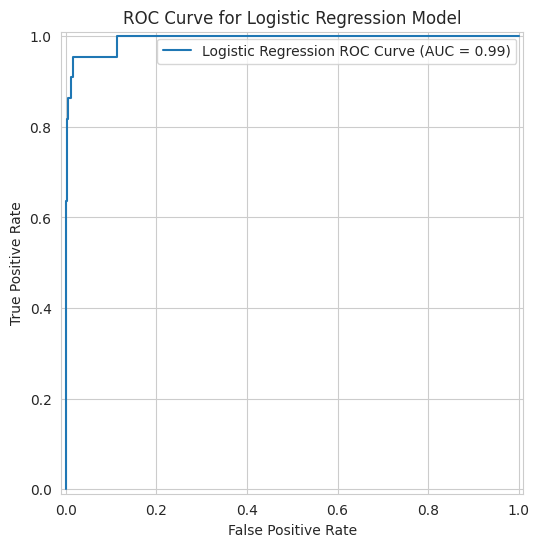

Confusion matrix and ROC curve generated and displayed.


In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create and display the confusion matrix plot
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot the ROC curve
plt.figure(figsize=(8, 6))
ax = plt.gca()
roc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test, ax=ax, name='Logistic Regression ROC Curve')
plt.title('ROC Curve for Logistic Regression Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

print("Confusion matrix and ROC curve generated and displayed.")